# Initial Data Analysis (IDA)

This notebook performs initial data analysis on the California Housing dataset.  
It covers:
1. Data loading  
2. Data type analysis  
3. Stratified train/test splitting  
4. Saving datasets to the appropriate folders


# Step 2. Load Raw Training Dataset


In [79]:
from pathlib import Path
import pandas as pd
import os

# Set working directory to /analysis
os.chdir("/Users/sukainaalkhalidy/Desktop/CMSE492/ca_housing_project/analysis")

# Paths
RAW_FP   = Path("../data/raw/housing.csv")
TRAIN_FP = Path("../data/train/housing_train.csv")
TEST_FP  = Path("../data/test/housing_test.csv")

# Ensure train/test dirs exist
TRAIN_FP.parent.mkdir(parents=True, exist_ok=True)
TEST_FP.parent.mkdir(parents=True, exist_ok=True)

# Load raw dataset
housing = pd.read_csv(RAW_FP)

print("Dataset shape:", housing.shape)
print("Columns:", housing.columns.tolist())
housing.head()


Dataset shape: (20640, 10)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Load Raw Dataset

In [80]:
# Load raw dataset
housing = pd.read_csv(RAW_PATH)

print("Dataset shape:", housing.shape)
print("Columns:", housing.columns.tolist())
housing.head()


Dataset shape: (20640, 10)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Inspect Dataset

In [81]:
# Info: datatypes and non-null counts
housing.info()

# Missing values
print("\nMissing values per column:")
print(housing.isna().sum())

# Summary statistics
housing.describe(include="all").transpose().head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_va

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640.0,NaN,NaN,NaN,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640.0,NaN,NaN,NaN,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,NaN,NaN,NaN,28.639486,12.585558,1.0,18.0,29.0,37.0,52.0
total_rooms,20640.0,NaN,NaN,NaN,2635.763081,2181.615252,2.0,1447.75,2127.0,3148.0,39320.0
total_bedrooms,20433.0,NaN,NaN,NaN,537.870553,421.38507,1.0,296.0,435.0,647.0,6445.0
population,20640.0,NaN,NaN,NaN,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0
households,20640.0,NaN,NaN,NaN,499.53968,382.329753,1.0,280.0,409.0,605.0,6082.0
median_income,20640.0,NaN,NaN,NaN,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,NaN,NaN,NaN,206855.816909,115395.615874,14999.0,119600.0,179700.0,264725.0,500001.0
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create Stratification Column

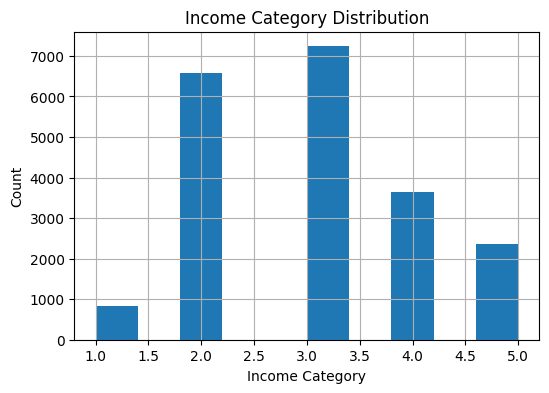

In [82]:
# Create income categories for stratified sampling
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Plot histogram
plt.figure(figsize=(6,4))
housing["income_cat"].hist()
plt.title("Income Category Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")

# Save to /images
IMAGES_DIR = PROJECT_DIR / "images"
IMAGES_DIR.mkdir(exist_ok=True)
plt.savefig(IMAGES_DIR / "income_cat_hist.png", dpi=300, bbox_inches="tight")
plt.show()


# Stratified Train/Test Split

In [83]:
# Perform stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx].copy()
    strat_test_set  = housing.loc[test_idx].copy()

# Drop helper column
for df in (strat_train_set, strat_test_set):
    df.drop(columns=["income_cat"], inplace=True)

print("Train shape:", strat_train_set.shape)
print("Test shape:", strat_test_set.shape)
strat_train_set.head()


Train shape: (16512, 10)
Test shape: (4128, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


# Save Train/Test Splits

In [84]:
# Save splits to /data/train and /data/test
strat_train_set.to_csv(TRAIN_PATH, index=False)
strat_test_set.to_csv(TEST_PATH, index=False)

print(f"Train set saved to {TRAIN_PATH}, shape={strat_train_set.shape}")
print(f"Test set saved to {TEST_PATH}, shape={strat_test_set.shape}")


Train set saved to /Users/sukainaalkhalidy/Desktop/CMSE492/ca_housing_project/data/train/housing_train.csv, shape=(16512, 10)
Test set saved to /Users/sukainaalkhalidy/Desktop/CMSE492/ca_housing_project/data/test/housing_test.csv, shape=(4128, 10)


## Summary

- Loaded raw dataset from `/data/raw/housing.csv`  
- Inspected datatypes, missing values, and summary statistics  
- Created an income-based stratification column and visualized its distribution  
- Performed stratified train/test split to preserve income distribution  
- Saved raw splits to:  
  - `/data/train/housing_train.csv`  
  - `/data/test/housing_test.csv`  

Next: move to **EDA.ipynb** for geographic visualizations, correlation analysis, and feature engineering.
